# Importar librerias y montar Drive

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Carga Dataset Voice
Dataset elegido con mas de 3000 registros y 19 features

In [2]:
dataset=pd.read_csv('/content/drive/MyDrive/Proyecto/voice.csv')
dataset

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


# Quitar ID's y Atributos además separar X y Y

In [3]:
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values

# Encoder para Y Class o Label

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)
Y
# male =1 female = 0

array([1, 1, 1, ..., 0, 0, 0])

# Para Entrenamiento y Para Prueba 1 

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.35, random_state=0)

# Escalado

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# Entrenamiento

In [7]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0, n_jobs=4)
rf_param_grid=dict(
    n_estimators=[10,20,50,100,200,500,1000,2000],
    max_depth=[1,2,3,4],
)
clf=GridSearchCV(classifier, rf_param_grid, scoring='accuracy', cv=5)

busqueda=clf.fit(X_train, y_train)
busqueda.best_params_

{'max_depth': 4, 'n_estimators': 100}

# Resultados

In [8]:
res=pd.DataFrame(busqueda.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
res

,params,mean_test_score,std_test_score
0,"{'max_depth': 1, 'n_estimators': 10}",0.887812,0.006543
1,"{'max_depth': 1, 'n_estimators': 20}",0.878097,0.005997
2,"{'max_depth': 1, 'n_estimators': 50}",0.896067,0.004154
3,"{'max_depth': 1, 'n_estimators': 100}",0.891696,0.003613
4,"{'max_depth': 1, 'n_estimators': 200}",0.890238,0.004171
5,"{'max_depth': 1, 'n_estimators': 500}",0.888782,0.004686
6,"{'max_depth': 1, 'n_estimators': 1000}",0.888782,0.004686
7,"{'max_depth': 1, 'n_estimators': 2000}",0.888782,0.003540
8,"{'max_depth': 2, 'n_estimators': 10}",0.886356,0.005557
9,"{'max_depth': 2, 'n_estimators': 20}",0.895576,0.013335


# Graficamente

Text(0.5, 0, 'Espacio Hiperparámetro')

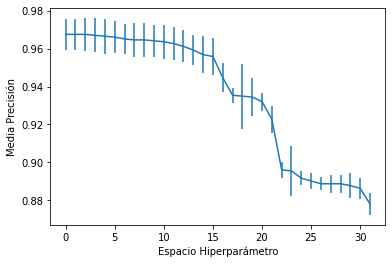

In [9]:
res.sort_values(by='mean_test_score', ascending=False, inplace=True)
res.reset_index(drop=True, inplace=True)
res['mean_test_score'].plot(yerr=[res['std_test_score'], res['std_test_score']])
plt.ylabel('Media Precisión')
plt.xlabel('Espacio Hiperparámetro')

# Cross Validation

In [10]:
from sklearn.model_selection import StratifiedKFold, cross_validate
skf=StratifiedKFold(n_splits=10, shuffle=True, random_state=4)
clf2=cross_validate(
    classifier, 
    X_train, 
    y_train, 
    scoring='accuracy',
    return_train_score=True,
    cv=skf
)
len(clf2['test_score'])

10

In [11]:
print('precisión media train set: ', np.mean(clf2['train_score']), ' +- ', np.std(clf2['train_score']))
print('precisión media test set: ', np.mean(clf2['test_score']), ' +- ', np.std(clf2['test_score']))

precisión media train set:  0.9999460334592551  +-  0.0001618996222342295
precisión media test set:  0.9791191096376984  +-  0.0072103548188062


# Para Entrenamiento y Para Prueba 2

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.30, random_state=0)

# Escalado

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# Entrenamiento

In [14]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0, n_jobs=4)
rf_param_grid=dict(
    n_estimators=[10,20,50,100,200,500,1000,2000],
    max_depth=[1,2,3,4],
)
clf=GridSearchCV(classifier, rf_param_grid, scoring='accuracy', cv=5)

busqueda=clf.fit(X_train, y_train)
busqueda.best_params_

{'max_depth': 4, 'n_estimators': 500}

# Resultados

In [15]:
res=pd.DataFrame(busqueda.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
res

,params,mean_test_score,std_test_score
0,"{'max_depth': 1, 'n_estimators': 10}",0.888135,0.008427
1,"{'max_depth': 1, 'n_estimators': 20}",0.881372,0.007058
2,"{'max_depth': 1, 'n_estimators': 50}",0.897158,0.006323
3,"{'max_depth': 1, 'n_estimators': 100}",0.892648,0.005624
4,"{'max_depth': 1, 'n_estimators': 200}",0.892197,0.005218
5,"{'max_depth': 1, 'n_estimators': 500}",0.889491,0.005863
6,"{'max_depth': 1, 'n_estimators': 1000}",0.889942,0.005407
7,"{'max_depth': 1, 'n_estimators': 2000}",0.889942,0.005407
8,"{'max_depth': 2, 'n_estimators': 10}",0.889937,0.006365
9,"{'max_depth': 2, 'n_estimators': 20}",0.898047,0.013434


# Graficamente

Text(0.5, 0, 'Espacio Hiperparámetro')

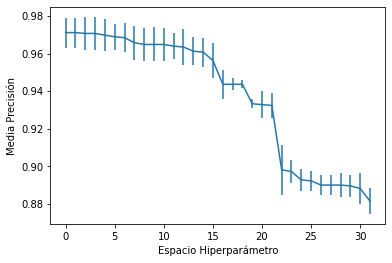

In [16]:
res.sort_values(by='mean_test_score', ascending=False, inplace=True)
res.reset_index(drop=True, inplace=True)
res['mean_test_score'].plot(yerr=[res['std_test_score'], res['std_test_score']])
plt.ylabel('Media Precisión')
plt.xlabel('Espacio Hiperparámetro')

# Cross Validation

In [17]:
from sklearn.model_selection import StratifiedKFold, cross_validate
skf=StratifiedKFold(n_splits=10, shuffle=True, random_state=4)
clf2=cross_validate(
    classifier, 
    X_train, 
    y_train, 
    scoring='accuracy',
    return_train_score=True,
    cv=skf
)
len(clf2['test_score'])

10

In [18]:
print('precisión media train set: ', np.mean(clf2['train_score']), ' +- ', np.std(clf2['train_score']))
print('precisión media test set: ', np.mean(clf2['test_score']), ' +- ', np.std(clf2['test_score']))

precisión media train set:  0.9998997744863161  +-  0.00020045103523350446
precisión media test set:  0.9778892014186132  +-  0.011679337528475643


# Para Entrenamiento y Para Prueba 3

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.28, random_state=0)

# Escalado

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# Entrenamiento

In [21]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0, n_jobs=4)
rf_param_grid=dict(
    n_estimators=[10,20,50,100,200,500,1000,2000],
    max_depth=[1,2,3,4],
)
clf=GridSearchCV(classifier, rf_param_grid, scoring='accuracy', cv=5)

busqueda=clf.fit(X_train, y_train)
busqueda.best_params_

{'max_depth': 4, 'n_estimators': 500}

# Resultados

In [22]:
res=pd.DataFrame(busqueda.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
res

,params,mean_test_score,std_test_score
0,"{'max_depth': 1, 'n_estimators': 10}",0.889035,0.007919
1,"{'max_depth': 1, 'n_estimators': 20}",0.878947,0.011883
2,"{'max_depth': 1, 'n_estimators': 50}",0.897807,0.009468
3,"{'max_depth': 1, 'n_estimators': 100}",0.892544,0.006505
4,"{'max_depth': 1, 'n_estimators': 200}",0.891667,0.006446
5,"{'max_depth': 1, 'n_estimators': 500}",0.889035,0.007018
6,"{'max_depth': 1, 'n_estimators': 1000}",0.889474,0.007546
7,"{'max_depth': 1, 'n_estimators': 2000}",0.889035,0.007153
8,"{'max_depth': 2, 'n_estimators': 10}",0.887719,0.006264
9,"{'max_depth': 2, 'n_estimators': 20}",0.903070,0.008482


# Graficamente

Text(0.5, 0, 'Espacio Hiperparámetro')

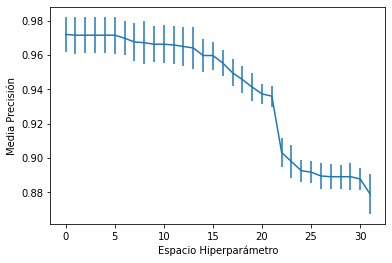

In [23]:
res.sort_values(by='mean_test_score', ascending=False, inplace=True)
res.reset_index(drop=True, inplace=True)
res['mean_test_score'].plot(yerr=[res['std_test_score'], res['std_test_score']])
plt.ylabel('Media Precisión')
plt.xlabel('Espacio Hiperparámetro')

# Cross Validation

In [24]:
from sklearn.model_selection import StratifiedKFold, cross_validate
skf=StratifiedKFold(n_splits=10, shuffle=True, random_state=4)
clf2=cross_validate(
    classifier, 
    X_train, 
    y_train, 
    scoring='accuracy',
    return_train_score=True,
    cv=skf
)
len(clf2['test_score'])

10

In [25]:
print('precisión media train set: ', np.mean(clf2['train_score']), ' +- ', np.std(clf2['train_score']))
print('precisión media test set: ', np.mean(clf2['test_score']), ' +- ', np.std(clf2['test_score']))

precisión media train set:  0.9999025341130604  +-  0.00019493177387914785
precisión media test set:  0.9793859649122807  +-  0.006808848550991221


# Para Entrenamiento y Para Prueba 4

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.26, random_state=0)

# Escalado

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# Entrenamiento

In [28]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0, n_jobs=4)
rf_param_grid=dict(
    n_estimators=[10,20,50,100,200,500,1000,2000],
    max_depth=[1,2,3,4],
)
clf=GridSearchCV(classifier, rf_param_grid, scoring='accuracy', cv=5)

busqueda=clf.fit(X_train, y_train)
busqueda.best_params_

{'max_depth': 4, 'n_estimators': 2000}

# Resultados

In [29]:
res=pd.DataFrame(busqueda.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
res

,params,mean_test_score,std_test_score
0,"{'max_depth': 1, 'n_estimators': 10}",0.887803,0.007279
1,"{'max_depth': 1, 'n_estimators': 20}",0.877563,0.008865
2,"{'max_depth': 1, 'n_estimators': 50}",0.900175,0.009437
3,"{'max_depth': 1, 'n_estimators': 100}",0.894200,0.005452
4,"{'max_depth': 1, 'n_estimators': 200}",0.892494,0.006504
5,"{'max_depth': 1, 'n_estimators': 500}",0.889935,0.005598
6,"{'max_depth': 1, 'n_estimators': 1000}",0.892067,0.007669
7,"{'max_depth': 1, 'n_estimators': 2000}",0.891641,0.006892
8,"{'max_depth': 2, 'n_estimators': 10}",0.887800,0.006387
9,"{'max_depth': 2, 'n_estimators': 20}",0.913829,0.022121


# Graficamente

Text(0.5, 0, 'Espacio Hiperparámetro')

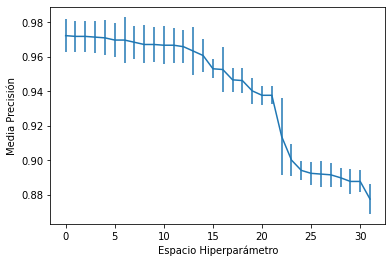

In [30]:
res.sort_values(by='mean_test_score', ascending=False, inplace=True)
res.reset_index(drop=True, inplace=True)
res['mean_test_score'].plot(yerr=[res['std_test_score'], res['std_test_score']])
plt.ylabel('Media Precisión')
plt.xlabel('Espacio Hiperparámetro')

# Cross Validation

In [31]:
from sklearn.model_selection import StratifiedKFold, cross_validate
skf=StratifiedKFold(n_splits=10, shuffle=True, random_state=4)
clf2=cross_validate(
    classifier, 
    X_train, 
    y_train, 
    scoring='accuracy',
    return_train_score=True,
    cv=skf
)
len(clf2['test_score'])

10

In [32]:
print('precisión media train set: ', np.mean(clf2['train_score']), ' +- ', np.std(clf2['train_score']))
print('precisión media test set: ', np.mean(clf2['test_score']), ' +- ', np.std(clf2['test_score']))

precisión media train set:  1.0  +-  0.0
precisión media test set:  0.978657937806874  +-  0.007665047047249639


# Para Entrenamiento y Para Prueba 5

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.24, random_state=0)

# Escalado

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# Entrenamiento

In [35]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0, n_jobs=4)
rf_param_grid=dict(
    n_estimators=[10,20,50,100,200,500,1000,2000],
    max_depth=[1,2,3,4],
)
clf=GridSearchCV(classifier, rf_param_grid, scoring='accuracy', cv=5)

busqueda=clf.fit(X_train, y_train)
busqueda.best_params_

{'max_depth': 4, 'n_estimators': 2000}

# Resultados

In [36]:
res=pd.DataFrame(busqueda.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
res

,params,mean_test_score,std_test_score
0,"{'max_depth': 1, 'n_estimators': 10}",0.890734,0.007523
1,"{'max_depth': 1, 'n_estimators': 20}",0.882843,0.009609
2,"{'max_depth': 1, 'n_estimators': 50}",0.899875,0.008957
3,"{'max_depth': 1, 'n_estimators': 100}",0.894888,0.007059
4,"{'max_depth': 1, 'n_estimators': 200}",0.893228,0.004278
5,"{'max_depth': 1, 'n_estimators': 500}",0.892397,0.006077
6,"{'max_depth': 1, 'n_estimators': 1000}",0.892396,0.006245
7,"{'max_depth': 1, 'n_estimators': 2000}",0.893227,0.006663
8,"{'max_depth': 2, 'n_estimators': 10}",0.889486,0.007174
9,"{'max_depth': 2, 'n_estimators': 20}",0.911077,0.018574


# Graficamente

Text(0.5, 0, 'Espacio Hiperparámetro')

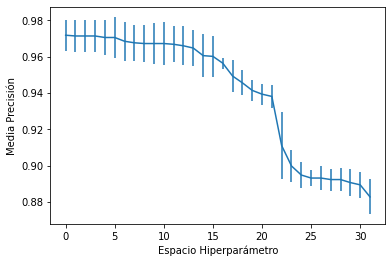

In [37]:
res.sort_values(by='mean_test_score', ascending=False, inplace=True)
res.reset_index(drop=True, inplace=True)
res['mean_test_score'].plot(yerr=[res['std_test_score'], res['std_test_score']])
plt.ylabel('Media Precisión')
plt.xlabel('Espacio Hiperparámetro')

# Cross Validation

In [38]:
from sklearn.model_selection import StratifiedKFold, cross_validate
skf=StratifiedKFold(n_splits=10, shuffle=True, random_state=4)
clf2=cross_validate(
    classifier, 
    X_train, 
    y_train, 
    scoring='accuracy',
    return_train_score=True,
    cv=skf
)
len(clf2['test_score'])

10

In [39]:
print('precisión media train set: ', np.mean(clf2['train_score']), ' +- ', np.std(clf2['train_score']))
print('precisión media test set: ', np.mean(clf2['test_score']), ' +- ', np.std(clf2['test_score']))

precisión media train set:  0.9999538319482918  +-  0.00013850415512465242
precisión media test set:  0.9792340940525589  +-  0.010334711721592636


# Para Entrenamiento y Para Prueba 6

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.22, random_state=0)

# Escalado

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# Entrenamiento

In [42]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0, n_jobs=4)
rf_param_grid=dict(
    n_estimators=[10,20,50,100,200,500,1000,2000],
    max_depth=[1,2,3,4],
)
clf=GridSearchCV(classifier, rf_param_grid, scoring='accuracy', cv=5)

busqueda=clf.fit(X_train, y_train)
busqueda.best_params_

{'max_depth': 4, 'n_estimators': 1000}

# Resultados

In [43]:
res=pd.DataFrame(busqueda.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
res

,params,mean_test_score,std_test_score
0,"{'max_depth': 1, 'n_estimators': 10}",0.890329,0.008016
1,"{'max_depth': 1, 'n_estimators': 20}",0.883046,0.012479
2,"{'max_depth': 1, 'n_estimators': 50}",0.898828,0.006245
3,"{'max_depth': 1, 'n_estimators': 100}",0.893565,0.008746
4,"{'max_depth': 1, 'n_estimators': 200}",0.893565,0.005678
5,"{'max_depth': 1, 'n_estimators': 500}",0.892756,0.007355
6,"{'max_depth': 1, 'n_estimators': 1000}",0.893970,0.006971
7,"{'max_depth': 1, 'n_estimators': 2000}",0.894375,0.007177
8,"{'max_depth': 2, 'n_estimators': 10}",0.888710,0.010471
9,"{'max_depth': 2, 'n_estimators': 20}",0.901664,0.018554


# Graficamente

Text(0.5, 0, 'Espacio Hiperparámetro')

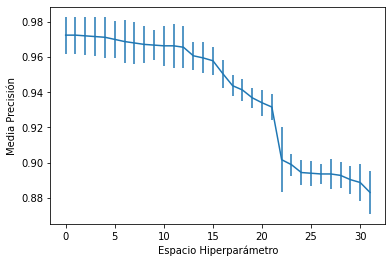

In [44]:
res.sort_values(by='mean_test_score', ascending=False, inplace=True)
res.reset_index(drop=True, inplace=True)
res['mean_test_score'].plot(yerr=[res['std_test_score'], res['std_test_score']])
plt.ylabel('Media Precisión')
plt.xlabel('Espacio Hiperparámetro')

# Cross Validation

In [45]:
from sklearn.model_selection import StratifiedKFold, cross_validate
skf=StratifiedKFold(n_splits=10, shuffle=True, random_state=4)
clf2=cross_validate(
    classifier, 
    X_train, 
    y_train, 
    scoring='accuracy',
    return_train_score=True,
    cv=skf
)
len(clf2['test_score'])

10

In [46]:
print('precisión media train set: ', np.mean(clf2['train_score']), ' +- ', np.std(clf2['train_score']))
print('precisión media test set: ', np.mean(clf2['test_score']), ' +- ', np.std(clf2['test_score']))

precisión media train set:  0.999955035971223  +-  0.00013489208633095108
precisión media test set:  0.9805733315920072  +-  0.007424050427274855


# Para Entrenamiento y Para Prueba 7

In [47]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.20, random_state=0)

# Escalado

In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# Entrenamiento

In [49]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0, n_jobs=4)
rf_param_grid=dict(
    n_estimators=[10,20,50,100,200,500,1000,2000],
    max_depth=[1,2,3,4],
)
clf=GridSearchCV(classifier, rf_param_grid, scoring='accuracy', cv=5)

busqueda=clf.fit(X_train, y_train)
busqueda.best_params_

{'max_depth': 4, 'n_estimators': 500}

# Resultados

In [50]:
res=pd.DataFrame(busqueda.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
res

,params,mean_test_score,std_test_score
0,"{'max_depth': 1, 'n_estimators': 10}",0.891084,0.006491
1,"{'max_depth': 1, 'n_estimators': 20}",0.881219,0.007982
2,"{'max_depth': 1, 'n_estimators': 50}",0.898187,0.004558
3,"{'max_depth': 1, 'n_estimators': 100}",0.893844,0.006277
4,"{'max_depth': 1, 'n_estimators': 200}",0.893844,0.002877
5,"{'max_depth': 1, 'n_estimators': 500}",0.891872,0.004360
6,"{'max_depth': 1, 'n_estimators': 1000}",0.892661,0.004743
7,"{'max_depth': 1, 'n_estimators': 2000}",0.893844,0.005192
8,"{'max_depth': 2, 'n_estimators': 10}",0.892659,0.004938
9,"{'max_depth': 2, 'n_estimators': 20}",0.898973,0.007431


# Graficamente

Text(0.5, 0, 'Espacio Hiperparámetro')

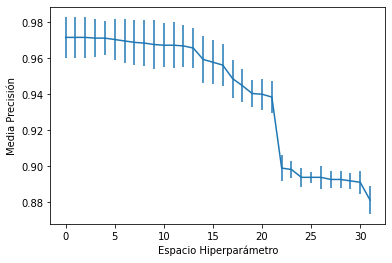

In [51]:
res.sort_values(by='mean_test_score', ascending=False, inplace=True)
res.reset_index(drop=True, inplace=True)
res['mean_test_score'].plot(yerr=[res['std_test_score'], res['std_test_score']])
plt.ylabel('Media Precisión')
plt.xlabel('Espacio Hiperparámetro')

# Cross Validation

In [52]:
from sklearn.model_selection import StratifiedKFold, cross_validate
skf=StratifiedKFold(n_splits=10, shuffle=True, random_state=4)
clf2=cross_validate(
    classifier, 
    X_train, 
    y_train, 
    scoring='accuracy',
    return_train_score=True,
    cv=skf
)
len(clf2['test_score'])

10

In [53]:
print('precisión media train set: ', np.mean(clf2['train_score']), ' +- ', np.std(clf2['train_score']))
print('precisión media test set: ', np.mean(clf2['test_score']), ' +- ', np.std(clf2['test_score']))

precisión media train set:  0.9999561403508771  +-  0.00013157894736840481
precisión media test set:  0.9802698328716817  +-  0.006604737026974233


# Para Entrenamiento y Para Prueba 8

In [54]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.15, random_state=0)

# Escalado

In [55]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# Entrenamiento

In [56]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0, n_jobs=4)
rf_param_grid=dict(
    n_estimators=[10,20,50,100,200,500,1000,2000],
    max_depth=[1,2,3,4],
)
clf=GridSearchCV(classifier, rf_param_grid, scoring='accuracy', cv=5)

busqueda=clf.fit(X_train, y_train)
busqueda.best_params_

{'max_depth': 4, 'n_estimators': 100}

# Resultados

In [57]:
res=pd.DataFrame(busqueda.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
res

,params,mean_test_score,std_test_score
0,"{'max_depth': 1, 'n_estimators': 10}",0.893015,0.008613
1,"{'max_depth': 1, 'n_estimators': 20}",0.882988,0.013229
2,"{'max_depth': 1, 'n_estimators': 50}",0.901930,0.008104
3,"{'max_depth': 1, 'n_estimators': 100}",0.895985,0.013377
4,"{'max_depth': 1, 'n_estimators': 200}",0.896356,0.009016
5,"{'max_depth': 1, 'n_estimators': 500}",0.894871,0.011812
6,"{'max_depth': 1, 'n_estimators': 1000}",0.895985,0.011050
7,"{'max_depth': 1, 'n_estimators': 2000}",0.895242,0.011333
8,"{'max_depth': 2, 'n_estimators': 10}",0.891524,0.009062
9,"{'max_depth': 2, 'n_estimators': 20}",0.905635,0.019543


# Graficamente

Text(0.5, 0, 'Espacio Hiperparámetro')

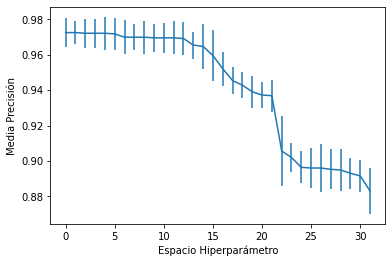

In [58]:
res.sort_values(by='mean_test_score', ascending=False, inplace=True)
res.reset_index(drop=True, inplace=True)
res['mean_test_score'].plot(yerr=[res['std_test_score'], res['std_test_score']])
plt.ylabel('Media Precisión')
plt.xlabel('Espacio Hiperparámetro')

# Cross Validation

In [59]:
from sklearn.model_selection import StratifiedKFold, cross_validate
skf=StratifiedKFold(n_splits=10, shuffle=True, random_state=4)
clf2=cross_validate(
    classifier, 
    X_train, 
    y_train, 
    scoring='accuracy',
    return_train_score=True,
    cv=skf
)
len(clf2['test_score'])

10

In [60]:
print('precisión media train set: ', np.mean(clf2['train_score']), ' +- ', np.std(clf2['train_score']))
print('precisión media test set: ', np.mean(clf2['test_score']), ' +- ', np.std(clf2['test_score']))

precisión media train set:  1.0  +-  0.0
precisión media test set:  0.9806856670797192  +-  0.007575773945217705


# Para Entrenamiento y Para Prueba 9

In [61]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.10, random_state=0)

# Escalado

In [62]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# Entrenamiento

In [63]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0, n_jobs=4)
rf_param_grid=dict(
    n_estimators=[10,20,50,100,200,500,1000,2000],
    max_depth=[1,2,3,4],
)
clf=GridSearchCV(classifier, rf_param_grid, scoring='accuracy', cv=5)

busqueda=clf.fit(X_train, y_train)
busqueda.best_params_

{'max_depth': 4, 'n_estimators': 100}

# Resultados

In [64]:
res=pd.DataFrame(busqueda.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
res

,params,mean_test_score,std_test_score
0,"{'max_depth': 1, 'n_estimators': 10}",0.892664,0.010062
1,"{'max_depth': 1, 'n_estimators': 20}",0.882494,0.008277
2,"{'max_depth': 1, 'n_estimators': 50}",0.901083,0.009030
3,"{'max_depth': 1, 'n_estimators': 100}",0.895470,0.011336
4,"{'max_depth': 1, 'n_estimators': 200}",0.895118,0.010064
5,"{'max_depth': 1, 'n_estimators': 500}",0.893014,0.010922
6,"{'max_depth': 1, 'n_estimators': 1000}",0.895119,0.010301
7,"{'max_depth': 1, 'n_estimators': 2000}",0.894769,0.009327
8,"{'max_depth': 2, 'n_estimators': 10}",0.893367,0.010287
9,"{'max_depth': 2, 'n_estimators': 20}",0.913016,0.012896


# Graficamente

Text(0.5, 0, 'Espacio Hiperparámetro')

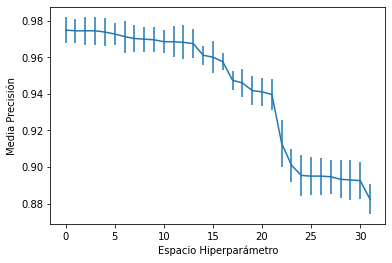

In [65]:
res.sort_values(by='mean_test_score', ascending=False, inplace=True)
res.reset_index(drop=True, inplace=True)
res['mean_test_score'].plot(yerr=[res['std_test_score'], res['std_test_score']])
plt.ylabel('Media Precisión')
plt.xlabel('Espacio Hiperparámetro')

# Cross Validation

In [66]:
from sklearn.model_selection import StratifiedKFold, cross_validate
skf=StratifiedKFold(n_splits=10, shuffle=True, random_state=4)
clf2=cross_validate(
    classifier, 
    X_train, 
    y_train, 
    scoring='accuracy',
    return_train_score=True,
    cv=skf
)
len(clf2['test_score'])

10

In [67]:
print('precisión media train set: ', np.mean(clf2['train_score']), ' +- ', np.std(clf2['train_score']))
print('precisión media test set: ', np.mean(clf2['test_score']), ' +- ', np.std(clf2['test_score']))

precisión media train set:  0.9999610288386593  +-  0.0001169134840218189
precisión media test set:  0.9810612194822721  +-  0.007386962258607473


# Para Entrenamiento y Para Prueba 10

In [68]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.05, random_state=0)

# Escalado

In [69]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# Entrenamiento

In [70]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0, n_jobs=4)
rf_param_grid=dict(
    n_estimators=[10,20,50,100,200,500,1000,2000],
    max_depth=[1,2,3,4],
)
clf=GridSearchCV(classifier, rf_param_grid, scoring='accuracy', cv=5)

busqueda=clf.fit(X_train, y_train)
busqueda.best_params_

{'max_depth': 4, 'n_estimators': 100}

# Resultados

In [71]:
res=pd.DataFrame(busqueda.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
res

,params,mean_test_score,std_test_score
0,"{'max_depth': 1, 'n_estimators': 10}",0.893985,0.006512
1,"{'max_depth': 1, 'n_estimators': 20}",0.886009,0.009251
2,"{'max_depth': 1, 'n_estimators': 50}",0.902292,0.006770
3,"{'max_depth': 1, 'n_estimators': 100}",0.897306,0.009499
4,"{'max_depth': 1, 'n_estimators': 200}",0.894980,0.005727
5,"{'max_depth': 1, 'n_estimators': 500}",0.894316,0.005645
6,"{'max_depth': 1, 'n_estimators': 1000}",0.895313,0.005276
7,"{'max_depth': 1, 'n_estimators': 2000}",0.896975,0.006055
8,"{'max_depth': 2, 'n_estimators': 10}",0.893983,0.007695
9,"{'max_depth': 2, 'n_estimators': 20}",0.904953,0.013297


# Graficamente

Text(0.5, 0, 'Espacio Hiperparámetro')

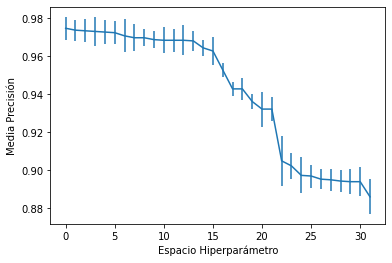

In [72]:
res.sort_values(by='mean_test_score', ascending=False, inplace=True)
res.reset_index(drop=True, inplace=True)
res['mean_test_score'].plot(yerr=[res['std_test_score'], res['std_test_score']])
plt.ylabel('Media Precisión')
plt.xlabel('Espacio Hiperparámetro')

# Cross Validation

In [73]:
from sklearn.model_selection import StratifiedKFold, cross_validate
skf=StratifiedKFold(n_splits=10, shuffle=True, random_state=4)
clf2=cross_validate(
    classifier, 
    X_train, 
    y_train, 
    scoring='accuracy',
    return_train_score=True,
    cv=skf
)
len(clf2['test_score'])

10

In [74]:
print('precisión media train set: ', np.mean(clf2['train_score']), ' +- ', np.std(clf2['train_score']))
print('precisión media test set: ', np.mean(clf2['test_score']), ' +- ', np.std(clf2['test_score']))

precisión media train set:  0.9999261447562777  +-  0.00014771048744459668
precisión media test set:  0.9800609080841637  +-  0.006966209152935037


# Predicción Final

In [78]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.25, random_state=0)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [79]:
classifier = RandomForestClassifier(n_estimators = 500, max_depth=4, criterion = 'entropy', random_state = 0, n_jobs=4)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Matriz de Confusión

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[364   9]
 [  8 411]]


0.9785353535353535

# Graficamente

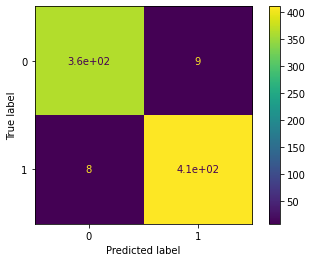

In [81]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()